<a href="https://colab.research.google.com/github/bforoura/AML/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: Simple Linear Regression

In [ ]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Read raw filefrom github into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv')

In [ ]:
# DataFrame is a 2D labeled data structure with columns of potentially different types. 
# It is generally the most commonly used pandas object.

#pd.set_option('display.max_rows', None)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# iterating the columns 
for col in df.columns: 
    print(col) 

print('    ')

# another way of iterating the columns 
sorted(df)

TV
Radio
Newspaper
Sales
    


['Newspaper', 'Radio', 'Sales', 'TV']

In [ ]:
# the size of the dataset
df.shape

(200, 4)

In [ ]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


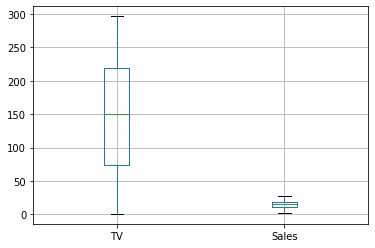

In [ ]:
df.boxplot(column=['TV', 'Sales'])

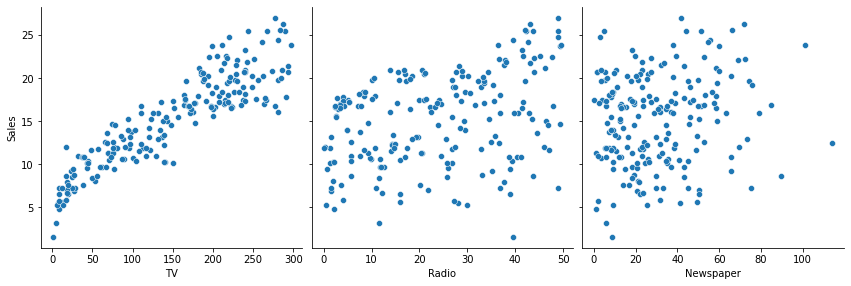

In [ ]:
# Here the target variable is the Sales column

sbn.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')

plt.show()

In [ ]:
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np


# Let's use simple linear regression for TV vs. Sales
from sklearn import linear_model
lm = linear_model.LinearRegression()

# one way to reshape an array by adding an extra dimension
# x = np.c_[df['TV']]
# y = np.c_[df['Sales']]

# another way to reshape is to add an extra column; -1 means we don't specify #rows
x = df['TV'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(6.974821488229891, 0.055464770469558874)

### **Linear Model**:   Sales = 6.974 + 0.0554 * TV

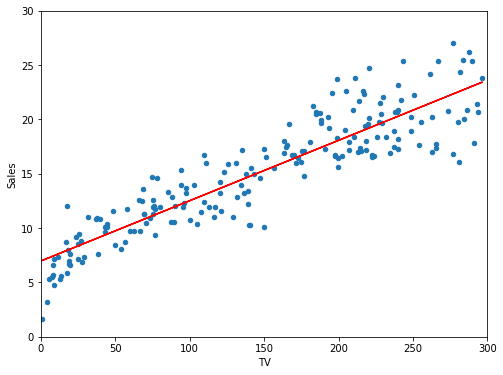

In [ ]:
# plot the best fit linear model
df.plot(kind='scatter', x='TV', y='Sales', figsize=(8, 6))

plt.axis([0, 300, 0, 30])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [ ]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)


In [ ]:
# 70% of 200 cases are used for training now
x_train.shape

(140, 1)

In [ ]:
# 30% of 200 cases are set aside for testing
x_test.shape

(60, 1)

In [ ]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [6.9486832]
Slope : [[0.05454575]]


### **Linear Model**:   Sales = 6.948 + 0.0545 * TV

In [ ]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score 0.7921031601245662
Mean squared error: 4.077556371826948


Resource: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols